In [ ]:
T2. Случайная величина имеет экспоненциальный закон распределения
    p(x) = {e^(-x) при x >= 0 | 0 при x <0}
    Сгенерируйте выборку объема n = 25

In [208]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [209]:
n = 25
lambd = 1
sample = np.random.exponential(
    scale=lambd, 
    size=n
)
sample.sort()
print("Выборка объема 25 (вариационный ряд)")
print(sample)
#sample = np.array(sorted([21, 28, 2, 10, 25, 19, 6, 13, 8, 12]))
#n = 10

Выборка объема 25 (вариационный ряд)
[0.01775692 0.05691712 0.13699274 0.15072669 0.15141129 0.2057507
 0.24263367 0.30580381 0.31825934 0.32000913 0.47699825 0.66243432
 0.77112517 0.79554146 0.86550695 0.9919635  1.17900667 1.41366323
 1.8140482  1.88624778 2.03312562 2.04225967 2.21990747 2.27023387
 3.9465748 ]


In [ ]:



а) Определить по выборке моду, медиану, размах, оценку коэффициента ассиметрии

In [210]:
mode = stats.mode(sample, keepdims=True)
print("Мода: ", mode.mode if mode.count > 1 else "все элементы выборки")

Мода:  все элементы выборки


In [211]:
print("Медиана: ", np.median(sample))

Медиана:  0.7711251735286448


In [212]:
print("Размах: ", np.max(sample) - np.min(sample))

Размах:  3.92881787931063


In [213]:
mean = np.mean(sample)
third_central_moment = np.sum((sample - mean)**3) / n
second_central_moment = np.sum((sample - mean)**2) / n
assimetria_koefficient = third_central_moment / (second_central_moment**(3/2))
print("Коэффициент ассиметрии: ", assimetria_koefficient)

Коэффициент ассиметрии:  1.2212855054424276


In [ ]:







б) Построить эмпирическую функцию распределения, гистограмму и boxplot

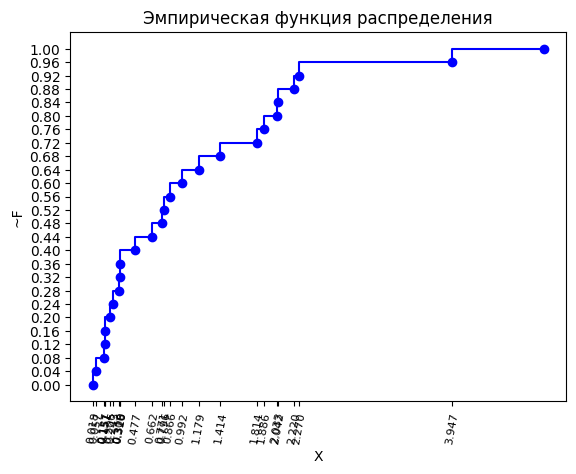

In [214]:
y = np.arange(len(sample))/n

x = np.append(sample, (sample[-1]+1))
y = np.append(y, 1)
plt.step(x, y, "b-o", where='pre')

plt.xlabel('X')
plt.ylabel('~F')
plt.title('Эмпирическая функция распределения')
plt.xticks(x[:-1], rotation=80)
plt.rc("xtick", labelsize=8)
plt.yticks(y)

plt.show()

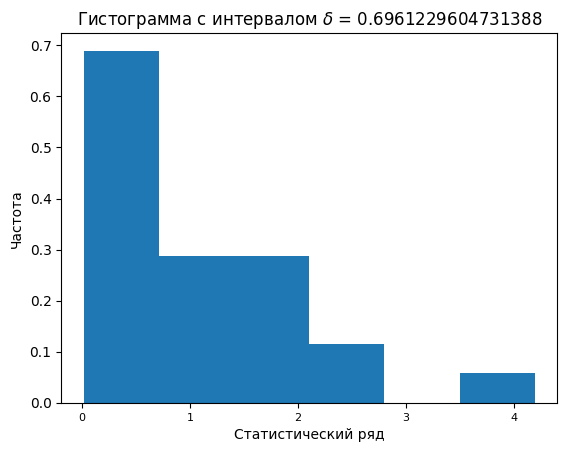

In [215]:
delta = (np.max(sample) - np.min(sample)) / (1+np.log2(n))

# Построение гистограммы
plt.hist(sample, bins=np.arange(min(sample), max(sample) + delta, delta), density=True)

# Настройка графика
plt.xlabel('Статистический ряд')
plt.ylabel('Частота')
plt.title('Гистограмма с интервалом $\delta$ = {}'.format(delta))

# Отображение графика
plt.show()

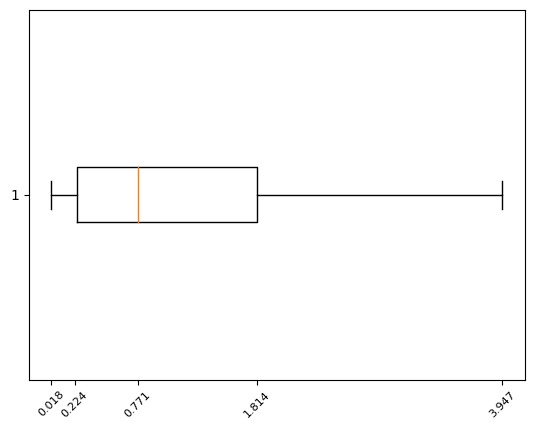

In [216]:
q1 = np.median(sample[:n//2])
q2 = np.median(sample[n//2:])
    
plt.boxplot(sample, vert=False)

plt.xticks([np.min(sample), q1, np.median(sample), q2, np.max(sample)], rotation=45)
plt.show()

In [ ]:






Определить плотность распределения среднего арифметического элементов выборки, 
сравнить с бутстраповской оценкой плотности.

1) по следствию из ЦПТ: X_ср ~ N( M(xi), D(xi)/n )

2) M(xi) = 1 / lambda = 1            
   D(xi) = 1 / lambda^2 = 1
   
=> X_ср ~ N(1, 1/25)
=> плотность распределения Х_ср = 5/sqrt(2pi) * exp( -25/2 * (х-1)^2 )

In [ ]:
BOOTSTRAP (среднее):

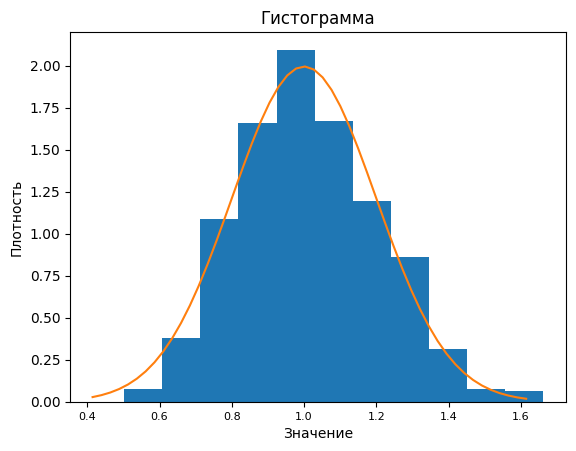

In [237]:
N = 1000
subarrays = np.random.choice(sample, size=(N, n), replace=True) #генерация подвыборок

subarrays_means = np.mean(subarrays, axis=1) # среднее арифметическое по каждой подвыборке

#Строим гистограмму по вектору средних значений подвыборок
fig, ax = plt.subplots()
delta = (np.max(subarrays_means) - np.min(subarrays_means)) / (1+np.log2(len(subarrays_means)))
ax.hist(subarrays_means, 
        bins=np.arange(min(subarrays_means), max(subarrays_means) + delta, delta), 
        density=True)

#строим поверх неё наш точный закон распределения X_cp
x = np.linspace(np.mean(subarrays_means)-3*1/5, np.mean(subarrays_means)+3*1/5)
y = (5 / (2*np.pi)**(1/2)) * np.exp(-25/2 * (x-1)**2 )
ax.plot(x, y)

# Настройка графика
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.title('Гистограмма')
# Отображение графика
plt.show()

In [ ]:






Найти бутстраповскую оценку плотности распределения коэффициента ассиметрии

In [ ]:
BOOTSTRAP(коэффициент ассиметрии):

In [231]:
subarrays = np.random.choice(sample, size=(N, n), replace=True) #генерация подвыборок

#посчитаем коэффициент ассиметрии для каждой подвыборки
mean = np.mean(subarrays, axis=1, keepdims=True)
third_central_moment = np.sum((subarrays - mean)**3, axis=1) / subarrays.shape[1]
second_central_moment = np.sum((subarrays - mean)**2, axis=1) / subarrays.shape[1]
asymmetry_coefficient = third_central_moment / (second_central_moment**(3/2))

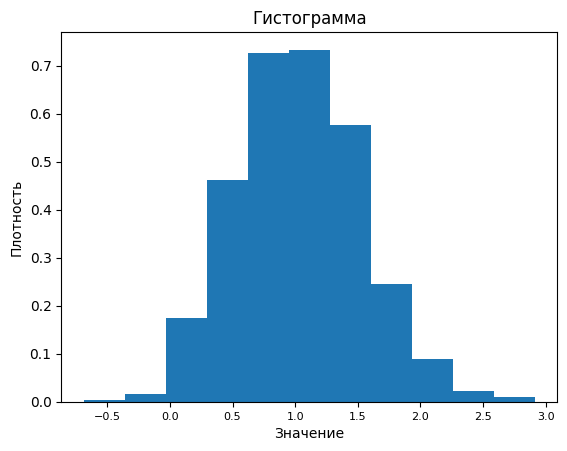

In [238]:
#Строим гистограмму по вектору коэффициентов ассиметрии подвыборок
fig, ax = plt.subplots()
delta = (np.max(asymmetry_coefficient) - np.min(asymmetry_coefficient)) / (1+np.log2(len(asymmetry_coefficient)))
ax.hist(asymmetry_coefficient, 
        bins=np.arange(min(asymmetry_coefficient), max(asymmetry_coefficient) + delta, delta), 
        density=True)
# Настройка графика
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.title('Гистограмма')
# Отображение графика
plt.show()

In [ ]:





Найти плотность распределения медианы и сравнить с бутстраповской оценкой.

In [ ]:
Воспользуемся распределением порядковых статистик.
Медиана выборки объемом 25 элементов это 13 порядковая статистика
h(x) = n * p(x) * C_12_24 * (F(x))^24 * (1-F(x))^12
h(x) = 25*2704156 * (e^(-x))^13 * (1-e^(-x))^12

In [ ]:
BOOTSTRAP(медиана):

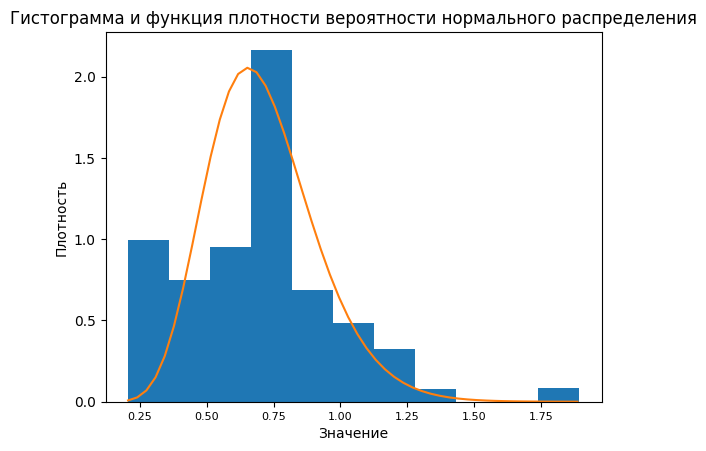

In [240]:
subarrays = np.random.choice(sample, size=(N, n), replace=True) #генерация подвыборок

subarrays_medians = np.median(subarrays, axis=1) # среднее арифметическое по каждой подвыборке

#Строим гистограмму по вектору средних значений подвыборок
fig, ax = plt.subplots()
delta = (np.max(subarrays_medians) - np.min(subarrays_medians)) / (1+np.log2(len(subarrays_medians)))
ax.hist(subarrays_medians, 
        bins=np.arange(min(subarrays_medians), max(subarrays_medians) + delta, delta), 
        density=True)

#строим поверх неё наш точный закон распределения X_cp
x = np.linspace(np.min(subarrays_medians), np.max(subarrays_medians))
y = 25 * 2704156 * (np.exp(-x))**13 * (1-np.exp(-x))**12
ax.plot(x, y)

# Настройка графика
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.title('Гистограмма и функция плотности вероятности нормального распределения')
# Отображение графика
plt.show()